# Understanding Regional Music Preferences: South Korea 🇰🇷 vs. USA 🇺🇸

## 1. Market Context: Why is Spotify Less Popular in Korea? 

While Spotify dominates the US market, it only accounts for ~2% of the Korean streaming market. Possible reasons include:
- Late market entry – Spotify launched in 2021, while its free tier was only introduced in 2023.
- Strong local competitors – Platforms like Melon, Genie, and YouTube Music are dominant. 
- Cultural & industry factors – K-pop streaming strategies differ, with companies promoting their artists differently on each platform.

Source: https://www.musicbusinessworldwide.com/spotify-launches-free-tier-in-south-korea12/

## 2. Business Problem: Why does this matter for streaming platforms?

For a global music platform like Spotify, understanding regional music trends is crucial to:

- Improve personalised recommendations to suggest relevant songs and artists based on user location and preferences.
- Optimise marketing strategies to identify which artists and genres to promote in each country.
- Guide licensing and acquisitions to decide which artists, albums, or labels are worth investing in for different markets.
- Enhance content curation to create region-specific playlists to increase user engagement.

## 3. Objective: Comparing Music Trends in South Korea & USA

Using Spotify's Top 50 charts from South Korea and the US, we aim to:
- Identify local hits vs global popular tracks. 
- Analyse artist distributions per country.
- Compare popularity scores of artists across both regions.
- Visualise data for actionable insights. 

## 4. Solution: Data-Driven Insights for Music Trends

**Step 1: Data Collection**

- Use Spotify API to fetch Top 50 charts from the US and Korea.
- Extract relevant details: song name, artist, popularity, release date etc.

**Step 2: Data Analysis and Visualisation**

Using EDA, bar charts, KDS plots, we compare:
- Track Overlap: Which songs appear in multiple countries vs. only in one?
- Artist Dominance: Which artists appear more frequently in each country?
- Artist Popularity: Do US and Korean artists have different popularity scores? 
- Release Trends: Are Korean charts more focused on newer songs?
- Album, Track Duration, and Release Date Comparison. 

**Step 3: Business Recommendations**

- For Spotify Korea: How to grow in Korea?
- For Advertisers: What does this mean for music marketing?

# 1. Data Collection

We use the Top Tracks of 2024 playlists in Korea and US. Recently in Nov 27th 2024, Spotify has made recent API changes where new Web API use cases will no longer be able to access audio features or featured playlists (Spotify-owned ediorial playlists). Therefore, I have manually created the exact US and Korea Top Tracks of 2024 playlists. 


In [360]:
import base64
from requests import post,get
import json
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
# Get Spotify API access
CLIENT_ID = "1b357da309fa4f6090422a4f0d9952fd"
CLIENT_SECRET = "dd5cf6c958ab485399e0ebf2313e7a96"

#Authentication 
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
spotify = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [416]:
def get_extract(track):
    # Track ID
    track_id = track['id']

    # Track Name
    name_song = track['name']

    # Artist
    artist_uri = track['artists'][0]['uri']
    artist_name = track['artists'][0]['name']
    
    # Fetch artist details (to get popularity & genres)
    artist_data = spotify.artist(artist_uri)
    artist_popularity = artist_data['popularity']
    artist_genres = artist_data['genres']

    # Album
    name_album = track['album']['name']
    release_date = track['album']['release_date']

    # Track Length (ms)
    length = track['duration_ms']

    # Track Popularity
    track_popularity = track['popularity']
    
    return [track_id, name_song, name_album, artist_name, release_date, length, track_popularity, artist_popularity, artist_genres]


In [418]:
def get_playlist(playlist_id):
    tracks = []
    
    # Fetch playlist tracks
    results = spotify.playlist_tracks(playlist_id)
    
    # Loop through the tracks
    for item in results['items']:
        track = item['track']
        if track:  # Ensure track is not None
            track_info = get_extract(track)  # Extract all track details
            tracks.append(track_info)

    # Convert to DataFrame with updated columns
    df = pd.DataFrame(tracks, columns=['track_id', 'song_name', 'album_name', 'artist_name', 'release_date', 
                                       'length', 'track_popularity', 'artist_popularity', 'artist_genres'])
    
    return df

In [420]:
# Your playlist ID
usa_playlist_id = "41oaRH2KoPixNG0Bh1H9G9"
korea_playlist_id = "0KjfSTzxjOx642hGgPd27K"

# Get playlist data
usa_playlist = get_playlist(usa_playlist_id)
korea_playlist = get_playlist(korea_playlist_id)


In [421]:
usa_playlist

,track_id,song_name,album_name,artist_name,release_date,length,track_popularity,artist_popularity,artist_genres
0,2HRqTpkrJO5ggZyyK6NPWz,Espresso,Short n' Sweet,Sabrina Carpenter,2024-08-23,175459,88,89,[]
1,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,274192,88,93,"[hip hop, west coast hip hop]"
2,5fZJQrFKWQLb7FpJXZ1g7K,A Bar Song (Tipsy),"Where I've Been, Isn't Where I'm Going",Shaboozey,2024-05-31,171291,82,77,[]
3,5IZXB5IKAD2qlvTPJYDCFB,I Had Some Help (Feat. Morgan Wallen),F-1 Trillion,Post Malone,2024-08-15,178205,83,87,[]
4,5AJ9hqTS2wcFQCELCFRO7A,MILLION DOLLAR BABY,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,155151,87,74,[]
5,0WbMK4wrZ1wFSty9F7FCgu,"Good Luck, Babe!","Good Luck, Babe!",Chappell Roan,2024-04-05,218423,92,84,[]
6,3xkHsmpQCBMytMJNiDf3Ii,Beautiful Things,Fireworks & Rollerblades,Benson Boone,2024-04-05,180304,86,82,[]
7,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,210373,96,93,[]
8,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,Zach Bryan,2023-08-25,227195,84,86,"[country, red dirt]"
9,0mflMxspEfB0VbI1kyLiAv,Stick Season,Stick Season,Noah Kahan,2022-10-14,182346,86,83,[]


In [422]:
korea_playlist

,track_id,song_name,album_name,artist_name,release_date,length,track_popularity,artist_popularity,artist_genres
0,7tI8dRuH2Yc6RuoTjxo4dU,Who,MUSE,Jimin,2024-07-19,170887,89,85,[k-pop]
1,3Ua0m0YmEjrMi9XErKcNiR,Like Crazy,FACE,Jimin,2023-03-24,212241,74,85,[k-pop]
2,2KslE17cAJNHTsI2MI0jb2,Standing Next to You,GOLDEN,Jung Kook,2023-11-03,206019,85,84,[k-pop]
3,2HRgqmZQC0MC7GeNuDIXHN,Seven (feat. Latto) (Explicit Ver.),GOLDEN,Jung Kook,2023-11-03,183550,84,84,[k-pop]
4,6qafqn8bBMy7t5c5WqpyRk,Closer Than This,MUSE,Jimin,2024-07-19,223301,69,85,[k-pop]
5,21ewxM3YvcdTj7cC0XwznO,Do or Die,Do or Die,Lim Young Woong,2023-10-09,205440,60,61,[k-ballad]
6,2N0SPREDYqILVEFSsWF5N5,Love Me Again,Layover,V,2023-08-11,182293,76,81,[k-pop]
7,01qFKNWq73UfEslI0GvumE,3D (feat. Jack Harlow),3D : The Remixes,Jung Kook,2023-10-02,201812,78,84,[k-pop]
8,4WUpMUjdoi47LY7gBQBXe3,Grain of Sand,Grain of Sand,Lim Young Woong,2023-06-05,220309,59,61,[k-ballad]
9,0u8rZGtXJrLtiSe34FPjGG,Like Crazy (English Version),FACE,Jimin,2023-03-24,212253,63,85,[k-pop]


In [439]:
# save dataset
usa_playlist.to_csv("usa_playlist.csv", index = True)
korea_playlist.to_csv("korea_playlist.csv", index = True)

In [16]:
# import dataset
usa_playlist = pd.read_csv("usa_playlist.csv")
korea_playlist = pd.read_csv("korea_playlist.csv")

In [18]:
# cleaning dataset
usa_playlist.iloc[:, 0] = usa_playlist.iloc[:, 0] + 1
usa_playlist.rename(columns={usa_playlist.columns[0]: "ranking"}, inplace=True)

korea_playlist.iloc[:, 0] = korea_playlist.iloc[:, 0] + 1
korea_playlist.rename(columns={korea_playlist.columns[0]: "ranking"}, inplace=True)

In [20]:
usa_playlist.drop("track_id", axis = 1, inplace = True)
korea_playlist.drop("track_id", axis = 1, inplace = True)

In [22]:
usa_playlist['release_date'] = pd.to_datetime(usa_playlist['release_date'])
usa_playlist['year'] = usa_playlist['release_date'].dt.year
usa_playlist['month'] = usa_playlist['release_date'].dt.month

korea_playlist['release_date'] = pd.to_datetime(korea_playlist['release_date'])
korea_playlist['year'] = korea_playlist['release_date'].dt.year
korea_playlist['month'] = korea_playlist['release_date'].dt.month

In [24]:
usa_playlist['length'] = usa_playlist['length']/1000
korea_playlist['length'] = korea_playlist['length']/1000
usa_playlist.rename(columns={'length': "length_sec"}, inplace=True)
korea_playlist.rename(columns={'length': "length_sec"}, inplace=True)

In [30]:
usa_playlist

,ranking,song_name,album_name,artist_name,release_date,length_sec,track_popularity,artist_popularity,artist_genres,year,month
0,1,Espresso,Short n' Sweet,Sabrina Carpenter,2024-08-23,175.459,88,89,[],2024,8
1,2,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,274.192,87,93,"['hip hop', 'west coast hip hop']",2024,5
2,3,A Bar Song (Tipsy),"Where I've Been, Isn't Where I'm Going",Shaboozey,2024-05-31,171.291,82,77,[],2024,5
3,4,I Had Some Help (Feat. Morgan Wallen),F-1 Trillion,Post Malone,2024-08-15,178.205,83,87,[],2024,8
4,5,MILLION DOLLAR BABY,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,155.151,87,74,[],2024,4
5,6,"Good Luck, Babe!","Good Luck, Babe!",Chappell Roan,2024-04-05,218.423,92,84,[],2024,4
6,7,Beautiful Things,Fireworks & Rollerblades,Benson Boone,2024-04-05,180.304,86,82,[],2024,4
7,8,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,210.373,96,93,[],2024,5
8,9,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,Zach Bryan,2023-08-25,227.195,84,86,"['country', 'red dirt']",2023,8
9,10,Stick Season,Stick Season,Noah Kahan,2022-10-14,182.346,86,83,[],2022,10


Genres are missing for some artists, so we ignore the genre variable. 

# 2. Data Analysis


**Song Overlap Analysis**

In [57]:
overlapping_songs = usa_playlist[usa_playlist['song_name'].isin(korea_playlist['song_name'])]
overlapping_songs

,ranking,song_name,album_name,artist_name,release_date,length_sec,track_popularity,artist_popularity,artist_genres,year,month
45,46,Who,MUSE,Jimin,2024-07-19,170.887,90,85,['k-pop'],2024,7


- We analysed the Top 50 Spotify charts for the US and South Korea to identify songs that appear in both countries.
- Only one overlaps: 'Who' by Jimin (a K-pop artist).
- This suggests that Spotify's Top 50 charts are highly region-specific, with almost no crossover between the two markets. This highlights the distinct listening preferences in each country. 

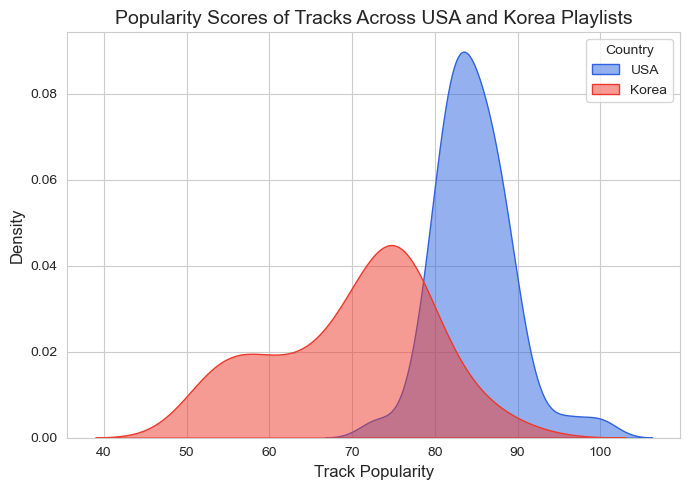

In [261]:
plt.figure(figsize = (7, 5))
plt.title('Popularity Scores of Tracks Across USA and Korea Playlists', fontsize = 14)
# USA plot
sns.kdeplot(x=usa_playlist['track_popularity'], color='#2d63df', fill = True, alpha=0.5, linewidth=1, label='USA')
sns.kdeplot(x=korea_playlist['track_popularity'], color='#ed392b', fill = True, alpha=0.5, linewidth=1, label='Korea')
plt.xlabel('Track Popularity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Country', fontsize=10)
plt.tight_layout()
plt.show()

- The tracks in the US playlist generally show higher popularity, with scores predominantly ranging from 70 to 100. The majority of tracks peak in the 80-90 range, indicating strong overall engagement. This suggests that US tracks are highly popular, with consistent listener interaction across multiple songs.
- In contrast, the tracks in the Korean playlist tend to have lower popularity scores, with most tracks falling within the 50-90 range. Popularity scores peak between 70 and 80.
This may reflect a more concentrated distribution of popularity, with a few tracks gaining higher scores while others are relatively less popular.

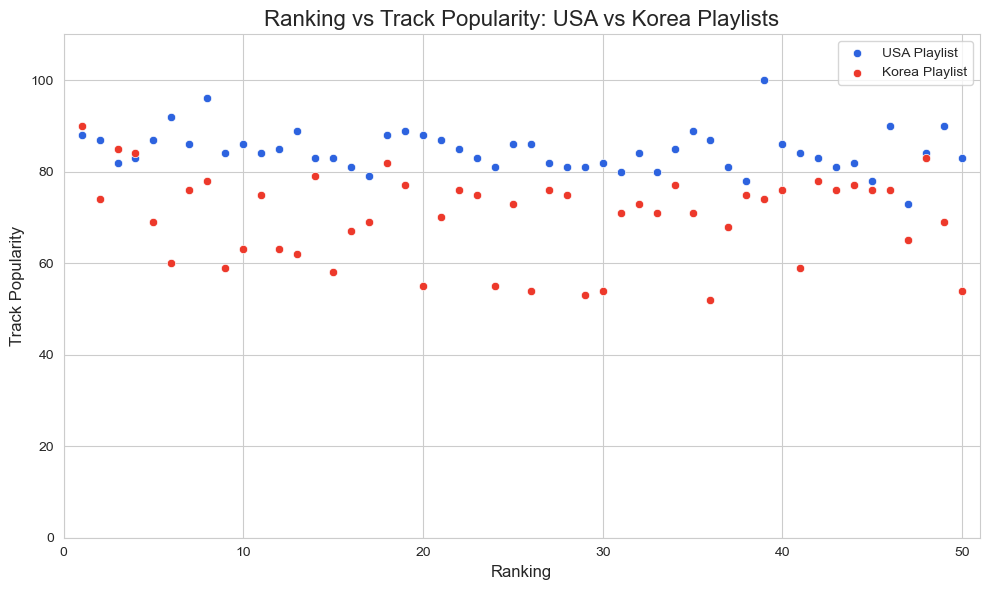

In [368]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='ranking', y='track_popularity', data=usa_playlist, color='#2d63df', label='USA Playlist')
sns.scatterplot(x='ranking', y='track_popularity', data=korea_playlist, color='#ed392b', label='Korea Playlist')
plt.title('Ranking vs Track Popularity: USA vs Korea Playlists', fontsize=16)
plt.xlabel('Ranking', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)

plt.xlim(0, max(usa_playlist['ranking'].max(), korea_playlist['ranking'].max()) + 1)  
plt.ylim(0, max(usa_playlist['track_popularity'].max(), korea_playlist['track_popularity'].max()) + 10)  # 

plt.legend()
plt.tight_layout()
plt.show()


- The lack of correlation between ranking and track popularity suggests that ranking might not be a perfect indicator of how popular a track is on Spotify, or there could be other factors influencing the rankings.
- A track's popularity might have increased recently but still be ranked low due to it being relatively new. Conversely, a track with a high ranking could be one that has been around for a while, maintaining its ranking due to sustained interest even if its current popularity has dropped.

**Artist Dominance Analysis**

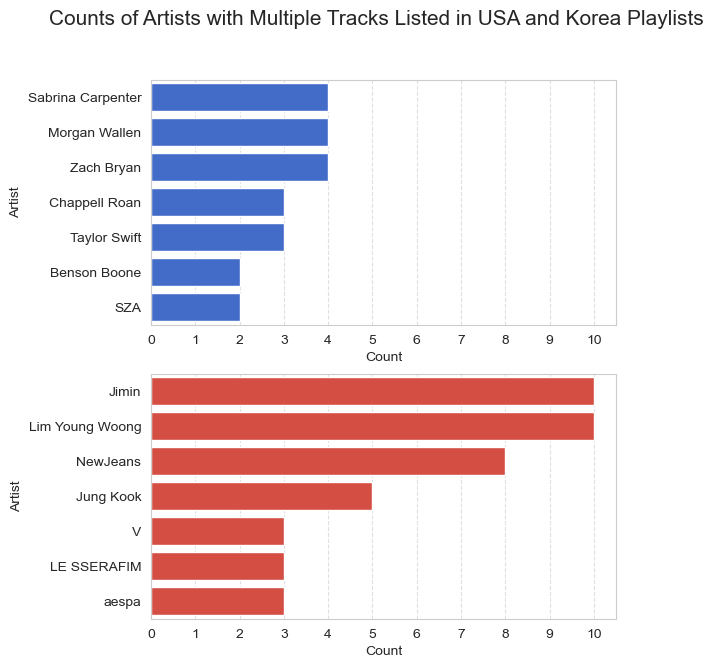

In [249]:
sns.set_style("whitegrid")
# Filter the dataset to include only artists > 1
usa_filtered_artists = usa_playlist['artist_name'].value_counts()
usa_filtered_artists = usa_filtered_artists[usa_filtered_artists > 1]
korea_filtered_artists = korea_playlist['artist_name'].value_counts()
korea_filtered_artists = korea_filtered_artists[korea_filtered_artists > 1]

fig, ax = plt.subplots(2, 1, figsize = (6, 7))
fig.suptitle('Counts of Artists with Multiple Tracks Listed in USA and Korea Playlists', fontsize=15)

# USA plot
sns.countplot(y=usa_playlist['artist_name'], order=usa_filtered_artists.index, ax=ax[0], color='#2d63df')
ax[0].set_xticks(np.arange(0, 11, step=1))
ax[0].set_xlabel('Count', fontsize=10)
ax[0].set_ylabel('Artist', fontsize=10)
ax[0].set_xlim(0, 10.5)
ax[0].grid(True, axis='x', linestyle='--', alpha=0.6)

sns.countplot(y=korea_playlist['artist_name'], order=korea_filtered_artists.index, ax=ax[1], color='#ed392b')
ax[1].set_xticks(np.arange(0, 11, step=1))
ax[1].set_xlabel('Count', fontsize=10)
ax[1].set_ylabel('Artist', fontsize=10)
ax[1].set_xlim(0, 10.5)
ax[1].grid(True, axis='x', linestyle='--', alpha=0.6)


**1. Artist Range in US Playlist:**
- The US playlist has a diverse set of artists, with a wide range of track counts suggesting a variety of artists contributing to the top tracks. 
- The highest number of tracks attributed to a single artist is 4, indicating a less concentrated artist distribution. 
  
**2. Artist Range in Korea Playlist:**
- The Korean playlist shows a skewed distribution with a small group of artists domincating the tracks. Notable, Jimin, Lim Young Woong, and NewJeans represent a substantial portion of the list.
- BTS's dominance: Tracks by Jimin, Jung Kook, and V from BTS collectively makes up 18 out of 50 tracks, pointing to the huge BTS fanbase on Spotify. BTS's tracks account for a large chunk of the playlist, revealing the deep influence of the group on the Korean streaming audience. 
- Lim Young Woong's Popularity: Lim Young Woong, a famous trot singer in Korea has an impressive presence in the playlist. Trot music, popular among older demographics, contrasts with the mainstream appeal of K-pop, which typically attracts younger listeners. Lim Young Woong's popularity on Spotify, a platform often associated with younger audiences, may reflect an increasing adoption of the service among older South Korean listeners. This trend suggests that Spotify's user base in Korea is expanding beyond its initial young demographic.

**Artist Popularity**

Compare popularity scores of artists across both regions.

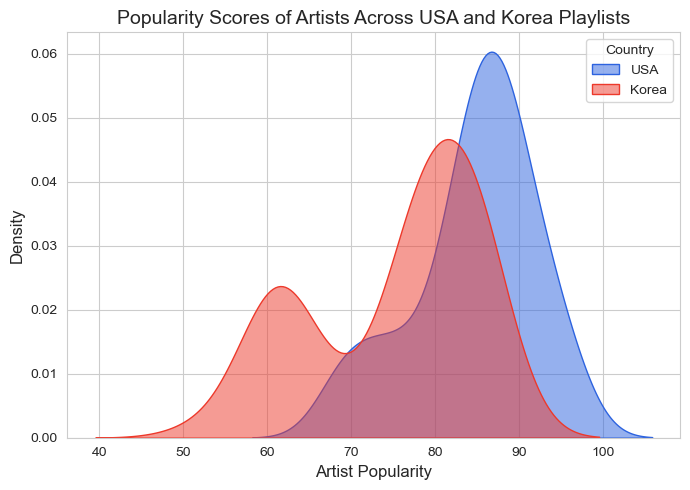

In [263]:
plt.figure(figsize = (7, 5))
plt.title('Popularity Scores of Artists Across USA and Korea Playlists', fontsize = 14)
# USA plot
sns.kdeplot(x=usa_playlist['artist_popularity'], color='#2d63df', fill = True, alpha=0.5, linewidth=1, label='USA')
sns.kdeplot(x=korea_playlist['artist_popularity'], color='#ed392b', fill = True, alpha=0.5, linewidth=1, label='Korea')
plt.xlabel('Artist Popularity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Country', fontsize=10)
plt.tight_layout()
plt.show()

- Artists in the US playlist generally show higher popularity, with scores ranging from 60 to 100. The majority of artists' popularity peaks in the late 80s, suggesting that many artists in the US playlist are well-established and consistently popular.
- In contrast, the popularity scores for artists in the Korea playlist are more varied, ranging from 50 to 90. There are two distinct peaks: one around 70 and another around 85. This dual peak could indicate the dominance of a few artists, such as Jimin and Lim Young Woong, who have a significant presence in the playlist. These artists likely drive up the popularity score, while other artists contribute to the broader distribution of popularity. 

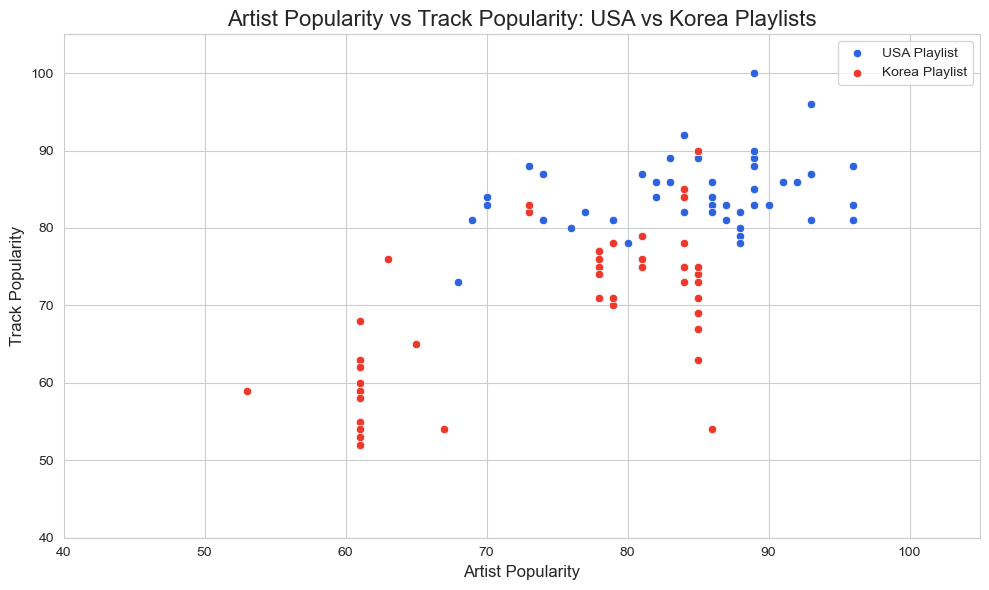

In [390]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='artist_popularity', y='track_popularity', data=usa_playlist, color='#2d63df', label='USA Playlist')
sns.scatterplot(x='artist_popularity', y='track_popularity', data=korea_playlist, color='#ed392b', label='Korea Playlist')
plt.title('Artist Popularity vs Track Popularity: USA vs Korea Playlists', fontsize=16)
plt.xlabel('Artist Popularity', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)

plt.xlim(40, 105)  
plt.ylim(40, 105)  

plt.legend()
plt.tight_layout()
plt.show()


- There seem to be some correlation for Track Popularity and Artist Popularity, meaning that more popular artists tend to have more popular tracks.
- However, this isn't always perfect. There seems to be cases where popular artists have less popular tracks. 

**Album Analysis**

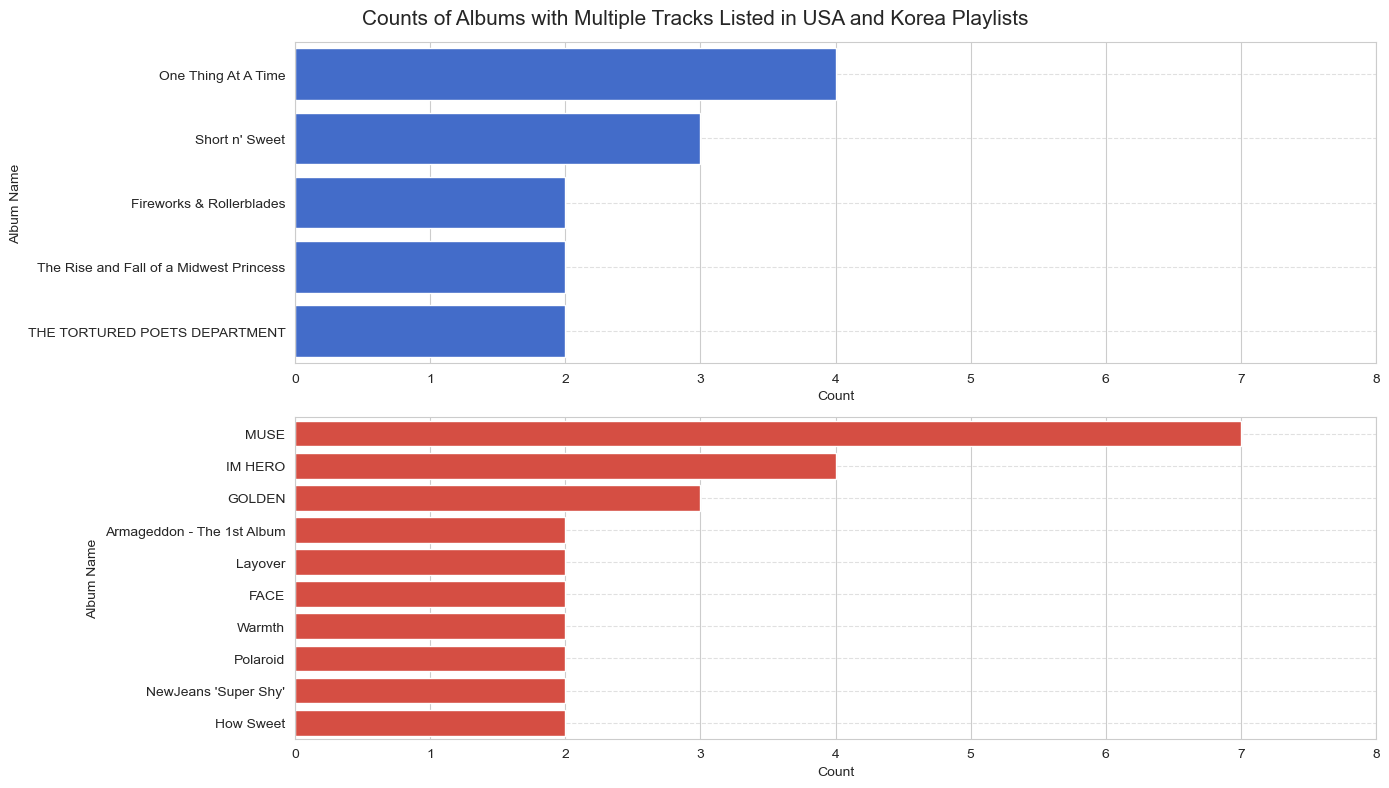

In [319]:
# Filter the dataset to include only albums > 1
usa_filtered_albums = usa_playlist['album_name'].value_counts()
usa_filtered_albums = usa_filtered_albums[usa_filtered_albums > 1]
korea_filtered_albums = korea_playlist['album_name'].value_counts()
korea_filtered_albums = korea_filtered_albums[korea_filtered_albums > 1]

fig, ax = plt.subplots(2, 1, figsize = (14, 8))
fig.suptitle('Counts of Albums with Multiple Tracks Listed in USA and Korea Playlists', fontsize=15)

# USA plot
sns.countplot(y=usa_playlist['album_name'], order=usa_filtered_albums.index, ax=ax[0], color='#2d63df')
ax[0].set_xlabel('Count', fontsize=10)
ax[0].set_xticks(np.arange(0, 8.5, step=1))
ax[0].set_ylabel('Album Name', fontsize=10)
ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# Korea plot
sns.countplot(y=korea_playlist['album_name'], order=korea_filtered_albums.index, ax=ax[1], color='#ed392b')
ax[1].set_xlabel('Count', fontsize=10)
ax[1].set_xticks(np.arange(0, 8.5, step=1))
ax[1].set_ylabel('Album Name', fontsize=10)
ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


- The US playlist contains a more diverse set of albums, with fewer albums having multiple tracks listed.
- The tracks in the Korea playlist are sourced from fewer albums, with some albums (like Jimin’s MUSE) having a significant number of tracks.
- The dominance of albums like MUSE could reflect the popularity of K-pop and specific artists (such as Jimin) in the Korean market, which contrasts with the variety in the US playlist where multiple genres and artists are more evenly distributed.

**Track Duration**

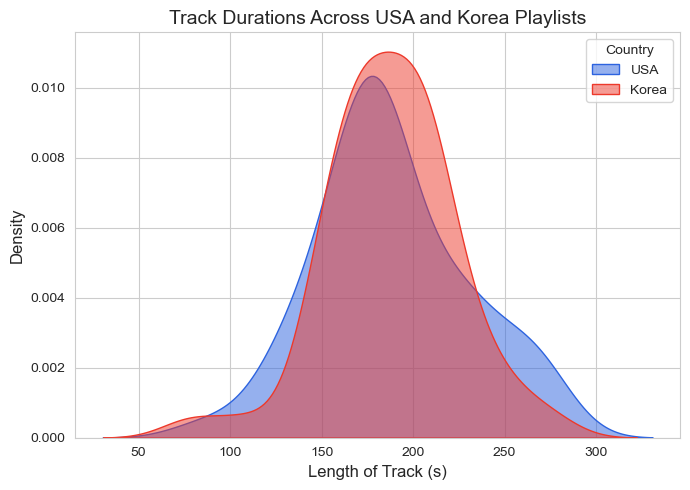

In [331]:
plt.figure(figsize = (7, 5))
plt.title('Track Durations Across USA and Korea Playlists', fontsize = 14)
# USA plot
sns.kdeplot(x=usa_playlist['length_sec'], color='#2d63df', fill = True, alpha=0.5, linewidth=1, label='USA')
sns.kdeplot(x=korea_playlist['length_sec'], color='#ed392b', fill = True, alpha=0.5, linewidth=1, label='Korea')
plt.xlabel('Length of Track (s)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Country', fontsize=10)
plt.tight_layout()
plt.show()

- We observe that there isn't a significant difference in the overall duration of tracks between the two countries. Both playlists show a similar trend where the majority of tracks hover around 170 seconds (around 3 minutes). 

**Release Date**

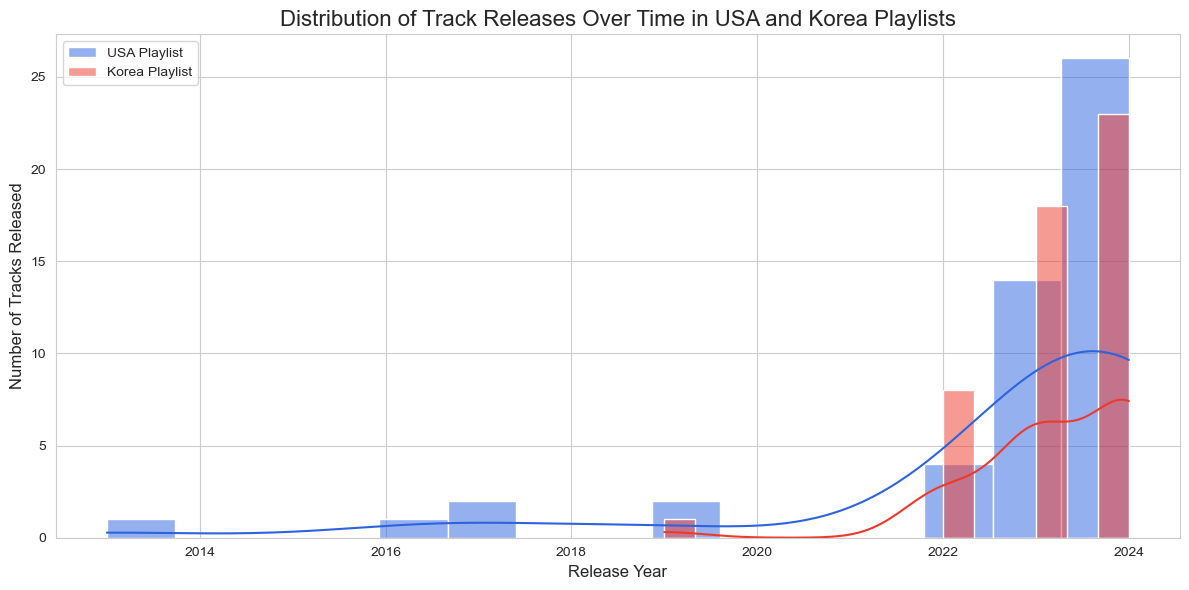

In [351]:
# Plotting Histograms for Release Dates (Year-wise)
plt.figure(figsize=(12, 6))

sns.histplot(usa_playlist['year'], color='#2d63df', kde=True, bins=15, label='USA Playlist', stat='count')
sns.histplot(korea_playlist['year'], color='#ed392b', kde=True, bins=15, label='Korea Playlist', stat='count')

plt.title('Distribution of Track Releases Over Time in USA and Korea Playlists', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Tracks Released', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- The tracks in the Korean playlist are mostly more recent, with only one track released before 2022. This suggests a trend where Korean music, especially on Spotify, is more focused on the latest releases.
- The USA playlist, in contrast, has tracks spanning a wider period, including songs that were released as far back as 10 years ago. This indicates a more diverse selection in terms of track age, with older songs still maintaining their relevance in the playlist.
-  Notably, both playlists show a surge in tracks released in 2024. The Korean playlist, while also having some tracks from 2024, it also has a large proportion of tracks released in 2022 and 2023, indicating that recent hits are dominating the playlist.

# 3. Business Recommendations

### Summary of insights

**Tracks** 
- Only one overlap track (Jimin's Who), which indicates distinct preferences in the US and Korean playlists.
- Tracks in the US playlist generally have higher popularity than those in the Korean playlist.

**Ranking vs. Popularity**
- There’s no strong correlation between track ranking and actual popularity, suggesting that ranking systems might not fully capture how popular a track is.

**Artist**
- The US playlist features a more diverse set of artists, with no artist contributing more than 4 tracks.
- The Korean playlist is dominated by a few key artists, particularly BTS and Lim Young Woong, showing BTS’s major influence in Korea.
- Lim Young Woong’s popularity points to an expanding older demographic on Spotify in Korea.
- Artist popularity scores in Korea show distinct peaks due to a few dominant artists, while the US playlist features more evenly distributed artist popularity.

**Album**
- The US playlist is more diverse, with fewer albums dominating the playlist.
- The Korean playlist has tracks from fewer albums, with certain albums like Jimin’s MUSE contributing multiple tracks, highlighting the K-pop focus.

**Track Duration**
- Similar track durations (~170 seconds or 3 minutes) across both playlists, indicating no major difference in track length.

**Release Dates**
- The Korean playlist features mostly recent tracks, with only one track from before 2022.
- The US playlist includes tracks from as far back as 10 years ago, showing a broader range of older and newer tracks, especially in 2024.

Music consumption is not the same in every country. By comparing Korean and US playlists, we gained insights into which genres, artists, and trends are more popular in each country. This helps Spotify to create more targeted strategies for content curation, advertising, and user acquisition.

### For Spotify Korea: How to grow in Korea?

**Targeting the Older Demographics:** 

The success of Lim Young Woong shows a growing interest in Trot music and older demographics in Korea. Spotify can expand its reach to these audiences by:
- Curating More Trot Playlists: Create curated playlists that cater to older listeners, tapping into the growing popularity of this genre.
- Collaborating with Trot Artists: Collaborating with influential Trot artists can help Spotify expand its listener base within this demographic.
- Marketing Campaigns for Older Users: Tailor marketing campaigns to older audiences who may not be as familiar with Spotify, leveraging Lim Young Woong's popularity to drive adoption. 
  
**K-pop Expansion:** Given the dominance of BTS and other K-pop groups, continue leveraging Spotify's relationship with K-pop to grow the platform:
- Exclusive K-pop Content: Offering exclusive releases, interviews, or live sessions from popular K-pop artists can make Spotify the go-to platform for K-pop fans.

**Increased Focus on Regional Music Trends:** Expand the catalogue to cover other regional genres beyond K-pop and Trot, such as hip-hop or indie, which may attract younger or more diverse listeners.

### For Advertisers: What Does This Mean for Music Marketing?
   
**Tailored Ads for Different Demographics:** Given the diversity of listeners in both countries (younger Korean listeners versus older audiences in Korea), music marketers should segment their ads accordingly. 

**Localised Marketing:** Create ads that cater specifically to the tastes of each country. For instance:
- US Focus: More diverse, blending genres and featuring a wider variety of artists.
- Korea Focus: More K-pop, Trot, and possibly indie genres, keeping in mind the rapidly shifting tastes toward newer tracks.

**Leveraging Exclusive Content:** Music marketing should emphasise exclusive content, such as behind-the-scenes videos, artist interviews, and live sessions. These exclusive elements can drive listener engagement and attract new subscribers:
- K-pop Exclusives: Special content from popular artists like Jimin or BTS could create hype and drive new user sign-ups in markets beyond Korea.
- Limited-Time Collaborations: Advertisers could work with Spotify to run campaigns where fans get early access to new releases or special promotions from top artists.